In [2]:
import numpy as np
import math
import random
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Create a boolean matrix in TF of size 138*7. Set all values to 0 and replace 1000 values randomly with 1.

In [3]:
a = np.zeros((138*87), dtype=bool)
a[np.random.choice(138*87, 1000, replace=False)] = 1 
a = a.reshape(138, 87)

In [4]:
b = tf.zeros((138*87), dtype=bool)

In [5]:
a

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False]])

In [6]:
b

<tf.Tensor: shape=(12006,), dtype=bool, numpy=array([False, False, False, ..., False, False, False])>

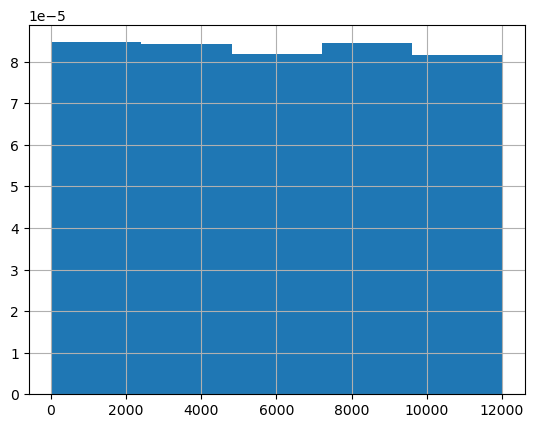

In [7]:
N = np.random.choice(138*87, 5000)
plt.hist(N, density=True, bins=5)
plt.grid()

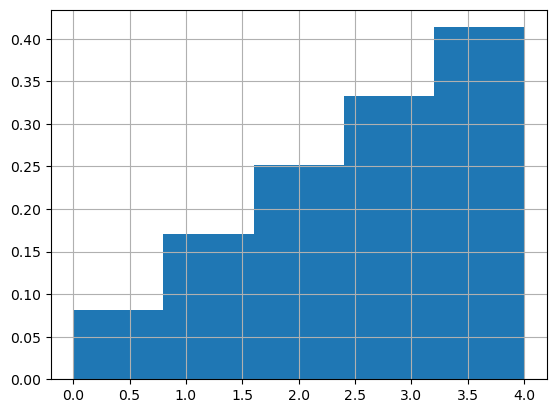

In [8]:
T = tf.random.categorical(tf.math.log([[i/sum(range(1,6)) for i in range(1,6)]]), 5000)
plt.hist(T, density=True, bins=5)
plt.grid()

### Create a linear layer class in Keras

In [9]:
class Linear(keras.layers.Layer):
    
    def __init__(self, units=32, input_dim=32):
        super().__init__()
        self.w = self.add_weight(shape=(input_dim, units), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(units, ), initializer='zeros', trainable=True)
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [10]:
tf.ones((2,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [11]:
linear_layer = Linear(4,2)

In [12]:
linear_layer(tf.ones((2,2)))

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.0335248 ,  0.09232893, -0.10511698,  0.17751282],
       [-0.0335248 ,  0.09232893, -0.10511698,  0.17751282]],
      dtype=float32)>

### Use build method to avoid having to specify input_dim

In [22]:
class Linear(keras.layers.Layer):
    
    def __init__(self, units=32):
        super().__init__()
        self.units = units
        
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(self.units, ), initializer='zeros', trainable=True)
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [25]:
linear_layer = Linear(10)

In [26]:
linear_layer(tf.ones((2,2)))

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.08571147,  0.12635203, -0.03606758,  0.05032724, -0.04293093,
         0.01498666,  0.03209276,  0.00575415, -0.03189175,  0.0393036 ],
       [-0.08571147,  0.12635203, -0.03606758,  0.05032724, -0.04293093,
         0.01498666,  0.03209276,  0.00575415, -0.03189175,  0.0393036 ]],
      dtype=float32)>

In [16]:
linear_layer.w

<tf.Variable 'linear_1/Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[ 2.21416652e-02,  3.94814461e-02,  3.41130048e-02,
         1.15610801e-01],
       [ 7.16143548e-02,  1.51088778e-02, -1.20663844e-01,
        -1.47280343e-05]], dtype=float32)>

In [17]:
linear_layer.b

<tf.Variable 'linear_1/Variable:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>

In [29]:
linear_layer = Linear(20)
linear_layer(tf.ones((2,2)))

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[-0.01526153, -0.00732493, -0.14205377,  0.05234469, -0.01941268,
         0.11525542,  0.10780286,  0.08061116,  0.048133  , -0.0512128 ,
        -0.13431744, -0.12463371, -0.07334576, -0.04532906,  0.0016698 ,
        -0.04639006,  0.00647996, -0.14412796, -0.01867399, -0.03668419],
       [-0.01526153, -0.00732493, -0.14205377,  0.05234469, -0.01941268,
         0.11525542,  0.10780286,  0.08061116,  0.048133  , -0.0512128 ,
        -0.13431744, -0.12463371, -0.07334576, -0.04532906,  0.0016698 ,
        -0.04639006,  0.00647996, -0.14412796, -0.01867399, -0.03668419]],
      dtype=float32)>

In [31]:
(X_train, y_train), _ = keras.datasets.mnist.load_data()

In [33]:
dataset = tf.data.Dataset.from_tensor_slices((X_train.reshape(60000, 784).astype('float32') / 255, y_train))

In [34]:
dataset = dataset.shuffle(buffer_size=1024).batch(64)

In [67]:
dqn = keras.Sequential(
    [
        keras.layers.Dense(4, activation=tf.nn.relu),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(2),
    ]
)

In [71]:
dqn(4)

ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).

Input 0 of layer "dense_18" is incompatible with the layer: expected min_ndim=2, found ndim=0. Full shape received: ()

Call arguments received by layer 'sequential_6' (type Sequential):
  • inputs=tf.Tensor(shape=(), dtype=int32)
  • training=None
  • mask=None

In [69]:
dqn.losses

[]

In [ ]:
# get data from act function
# write training loop

policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
memory = ReplayMemory(10000)

In [72]:
# A new MLP.
mlp = SparseMLP()

# Loss and optimizer.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(learning_rate=1e-3)

NameError: name 'SparseMLP' is not defined